Copyright (c) 2023 Graphcore Ltd. All rights reserved.

# NanoDFT notebook

## Dependencies and configuration

Install the JAX experimental for IPU (and addons).

In [ ]:
%pip install -q jax==0.3.16+ipu jaxlib==0.3.15+ipu.sdk320 -f https://graphcore-research.github.io/jax-experimental/wheels.html
%pip install -q git+https://github.com/graphcore-research/tessellate-ipu.git@main

In [1]:
import os

os.environ['OMP_NUM_THREADS'] = "16"
os.environ['TF_POPLAR_FLAGS'] = """
  --executable_cache_path=/tmp/ipu-ef-cache
  --show_progress_bar=true
"""

In [2]:
import jax

# Check IPU hardware configuration
assert jax.default_backend() == "ipu"
print(f"Platform={jax.default_backend()}")
print(f"Number of devices={jax.device_count()}")

devices = jax.devices()
print("\n".join([str(d) for d in devices]))

Platform=ipu
Number of devices=4
IpuDevice(id=0, num_tiles=1472, version=ipu2)
IpuDevice(id=1, num_tiles=1472, version=ipu2)
IpuDevice(id=2, num_tiles=1472, version=ipu2)
IpuDevice(id=3, num_tiles=1472, version=ipu2)


In [3]:
import sys
import os.path as osp
import numpy as np
from tqdm import tqdm

sys.path.append(osp.abspath(osp.join("..", "nanoDFT")))
from nanoDFT import *

def hydrogen_molecule(r: float, backend="cpu") -> float:
    args = nanoDFT_parser(backend="ipu", float32=True, mol_str=f"H 0. 0. 0.; H {r} 0.0 0.0")
    return nanoDFT(args)[0][-1, 0]


r = np.linspace(0.2, 3, 24)
energy = np.array([hydrogen_molecule(v) for v in tqdm(r)])

100%|██████████| 24/24 [01:38<00:00,  4.09s/it]


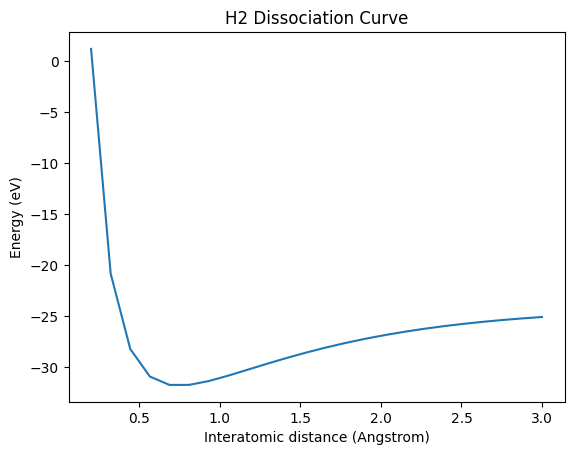

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(x=r, y=energy)
plt.xlabel("Interatomic distance (Angstrom)")
plt.ylabel("Energy (eV)")
plt.title("H2 Dissociation Curve");